In [1]:
import numpy as np
from utilities import visualize_result, show, get_test_data
import matplotlib.pyplot as plt
from HopfieldNetwork import HopfieldNetwork, LearningRule, Mode
from data_manager import *

In [2]:
data, sample_count_m, neurons_count_n, height, width = get_set_animals_14x9()
random_seed = 1

network = HopfieldNetwork(LearningRule.Hebb, Mode.Synchronous, data, sample_count_m, neurons_count_n, random_seed)
T_Hebb = network.get_weights()
random_generator = np.random.default_rng(seed=random_seed)

Model convergence at 6 iter
Accuracy synchronous: 0.746031746031746
Model convergence at 6 iter
Accuracy synchronous: 0.7936507936507936
Model convergence at 5 iter
Accuracy synchronous: 0.8412698412698413
Model convergence at 3 iter
Accuracy synchronous: 1.0
Model convergence at 7 iter
Accuracy synchronous: 0.6666666666666666
Model convergence at 5 iter
Accuracy synchronous: 0.8015873015873016


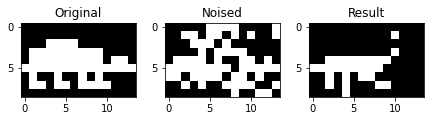

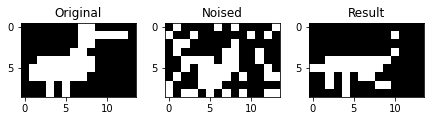

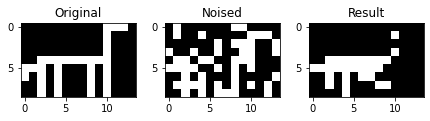

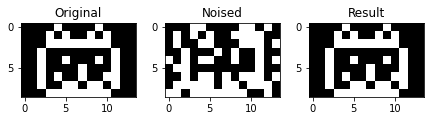

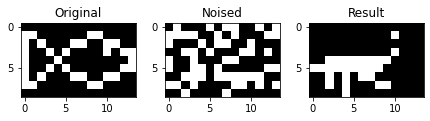

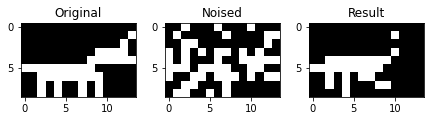

In [3]:
for i in range(0, sample_count_m):
    sample_id = i
    noise_percentage = 0.3
    noise_changes_count = int(noise_percentage * neurons_count_n)

    sample = np.reshape(data[:, sample_id], (neurons_count_n, 1))
    sample_test = get_test_data(np.copy(sample), noise_changes_count, random_generator)

    network.set_mode(Mode.Asynchronous)
    result_synchronous = network.recognize(T_Hebb, np.copy(sample_test), 1000)
    print("Accuracy synchronous: {0}".format(np.sum(sample == result_synchronous) / neurons_count_n))
    visualize_result(sample, sample_test, result_synchronous, height, width)
#     plt.show()